In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [109]:
from sklearn.model_selection import train_test_split

n_samples , n_outliers = 120 , 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5,-0.1],[0.7,0.4]])

cluster_1 = 0.4 * rng.randn(n_samples , 2 ) @ covariance + np.array([2,2])
cluster_2 = 0.3 * rng.randn(n_samples , 2) + np.array([-2,-2])
outliers = rng.uniform(low=-4 , high=4 , size=(n_outliers , 2))

X = np.concatenate([cluster_1 , cluster_2 , outliers])

pos_ones = np.ones((2 * n_samples) , dtype=int)
neq_ones = -np.ones(n_outliers,dtype=int)
y = np.concatenate([pos_ones , neq_ones])


X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0,stratify=y)

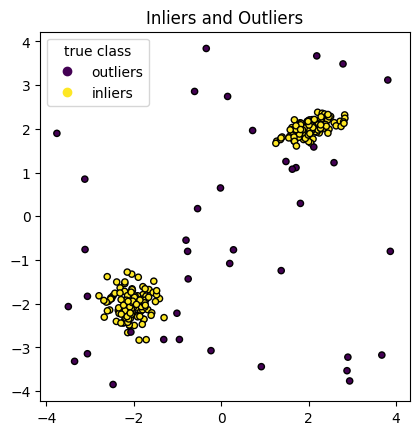

In [116]:
scatter = plt.scatter(X[:,0],X[:,1],c=y,s=20,edgecolor="k")
handles , labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles , labels=["outliers","inliers"],title="true class")
plt.title("Inliers and Outliers")
plt.show()

In [117]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100 , random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

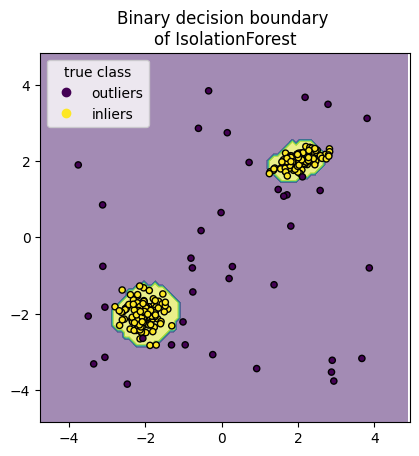

In [122]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

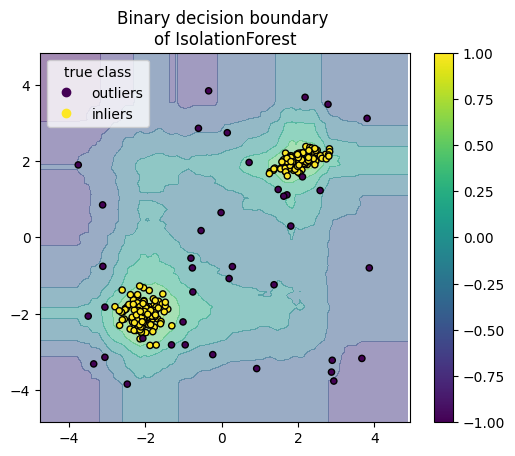

In [124]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()